# CNN with Keras

In [1]:
import numpy as np
import pandas as pd

## Brief Info

본 커널에서는 파이썬을 사용한 딥 러닝에 설명된 지침에 따라 케라스를 사용하여 CNN 분류기를 교육할 예정입니다.

우리의 전략은 분류기를 최적화하기 위해 훈련 데이터의 20%(12000개 데이터 행)를 검증 세트로 사용하는 것과 동시에 테스트 데이터를 유지하여 본 적이 없는 데이터에 대한 모델의 정확도를 최종적으로 평가하는 것입니다.

__Note__

데이터가 이미 분할된 것인지 확실하지 않기 때문에 `validation_split=0.2`를 전달하여 적합하지 않고, `validation_split`가 마지막 20%의 데이터를 사용하기 때문에 명시적으로 셔플 및 분할을 진행했습니다.

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('./input/fashion-mnist_train.csv')
data_test = pd.read_csv('./input/fashion-mnist_test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# Test data
X_test = np.array(data_test.iloc[:,1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))


X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal', 
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer = keras.optimizers.Adam(),
             metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)        

### Training
`fit()`은 훈련과 검증의 정확도 및loss 을 비교할 수 있는 그래프를 수 있는 History 오브젝트를 반환합니다.

In [6]:
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 58us/step - loss: 0.8520 - accuracy: 0.6824 - val_loss: 0.5043 - val_accuracy: 0.8147
Epoch 2/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.5171 - accuracy: 0.8056 - val_loss: 0.4136 - val_accuracy: 0.8487
Epoch 3/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.4500 - accuracy: 0.8337 - val_loss: 0.3654 - val_accuracy: 0.8653
Epoch 4/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.3999 - accuracy: 0.8535 - val_loss: 0.3374 - val_accuracy: 0.8754
Epoch 5/50
48000/48000 [==============================] - 1s 30us/step - loss: 0.3719 - accuracy: 0.8636 - val_loss: 0.3159 - val_accuracy: 0.8853
Epoch 6/50
48000/48000 [==============================] - 1s 29us/step - loss: 0.3430 - accuracy: 0.8741 - val_loss: 0.2951 - val_accuracy: 0.8910
Epoch 7/50
48000/48000 [==============================] - 1s 30us/st

In [7]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2034865104407072
Test accuracy: 0.9279000163078308


### Results
92%의 정확도를 가집니다.

이번에는 그래프를 통해 훈련과 검증의 정확도 및 손실을 살펴보겠습니다.

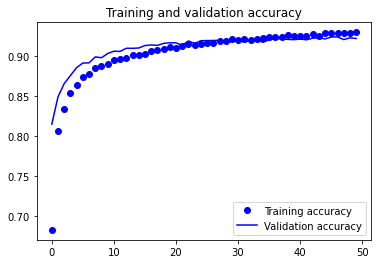

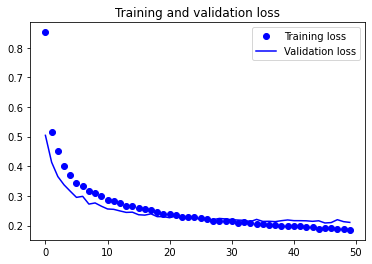

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Classification Report
분류기에 대해 성능을 요약해보겠습니다.

In [13]:
# get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(list(predicted_classes==y_true))[0]
incorrect = np.nonzero(list(predicted_classes!=y_true))[0]

In [14]:
from sklearn.metrics import classification_report
target_names = ['Class: {}'.format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

    Class: 0       0.88      0.90      0.89      1000
    Class: 1       0.99      0.99      0.99      1000
    Class: 2       0.90      0.89      0.89      1000
    Class: 3       0.94      0.93      0.94      1000
    Class: 4       0.90      0.87      0.88      1000
    Class: 5       0.99      0.98      0.98      1000
    Class: 6       0.77      0.81      0.79      1000
    Class: 7       0.96      0.97      0.97      1000
    Class: 8       0.99      0.98      0.99      1000
    Class: 9       0.97      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



분류기가 정밀도와 회수율 면에서 클래스 6이 성능이 떨어집니다. 클래스 2의 경우 분류기는 정밀도가 약간 부족한 반면 클래스 4은 회수율(즉 누락)은 약간 부족합니다.

아마 우리는 정확하고 부정확한 예측을 시각화한 후에 더 많은 통찰력을 얻을 수 있을 것입니다.

여기 정확하게 예측한 클래스의 부분 집합을 가져왔습니다.

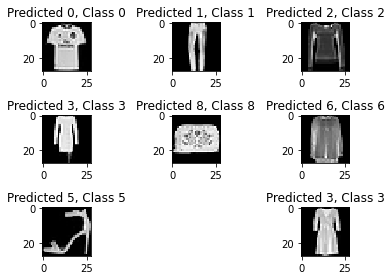

In [15]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

다음은 틀리게 예측한 클래스입니다.

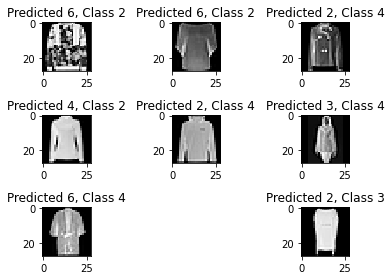

In [17]:
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

CNN은 강력한 아키텍처이지만 여러 클래스에 존재하는 유사한 패턴의 다양성은 분류기의 성능에 영향을 미치는 것으로 보입니다. 재킷, 셔츠, 그리고 긴 소매 블라우스는 유사한 패턴을 가지고 있습니다: 긴 소매, 단추, 기타 등등.
    
__활성화__

이 조각들은 Chollet, F (2017)에서 가져온 것입니다. 이 아이디어는 입력 데이터를 제공하고 변환기의 활성화를 시각화하는 것입니다.

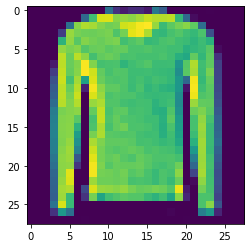

In [18]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28, 28), cmap='viridis', interpolation='none')
plt.show()

첫 번째 레이어의 두 번째 채널의 활성화를 살펴보겠습니다.

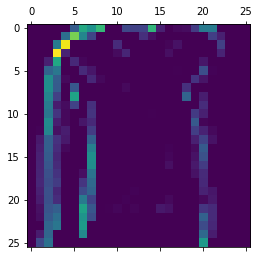

In [19]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(model.input, layer_outputs)
activations = activation_model.predict(test_im.reshape(1, 28, 28, 1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

다른 Conv의 활성화도 그려보겠습니다.

C:\ProgramData\Anaconda3\envs\tens_2g\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


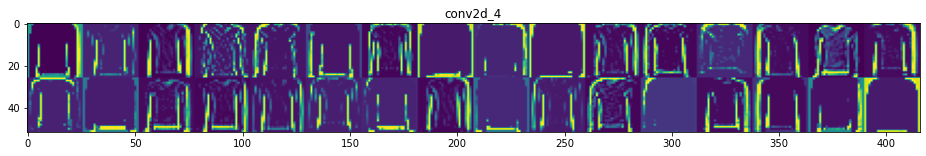

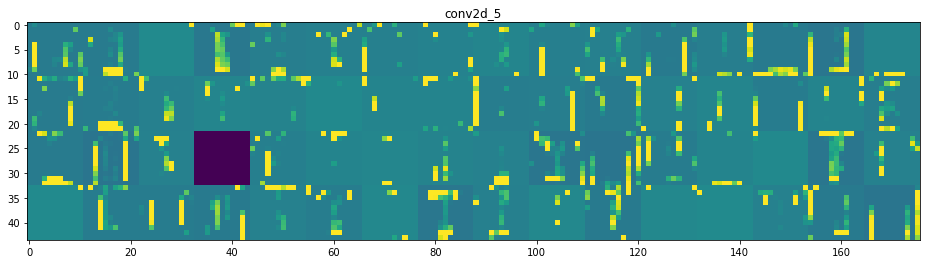

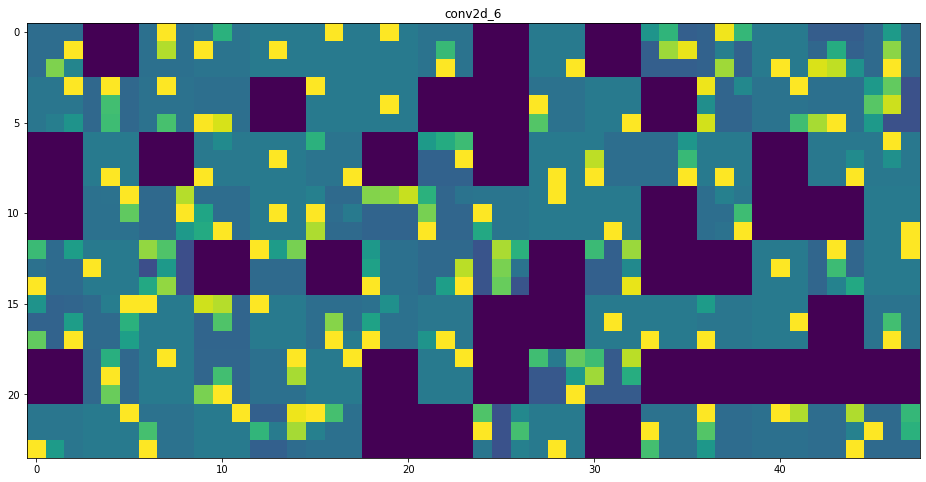

In [20]:
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col*images_per_row+row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col+1) * size,
                             row * size : (row+1) * size] = channel_image
        scale = 1./size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')